# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 Batch

Author :- Ajinkya Pramod Chate

Task-1:- Prediction Using Supervised Machine Learning Model

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset :- http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs/ day?

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

# Reading the csv file of student record and store it into the variable name called tsk1

In [12]:
tsk1 = pd.read_csv("students_scores.csv")
tsk1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis EDA on variable of dataset tsk1

In [14]:
tsk1.head() # Shows the first Five Rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
tsk1.tail() # Shows the last Five Rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [16]:
tsk1.shape

(25, 2)

In [17]:
tsk1.describe() # Shows some Statistical Data like Mean, Percentile, Count, Standard deviation, Minimum value, Maximum value 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
tsk1.info() # Gives the Summary of the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization 

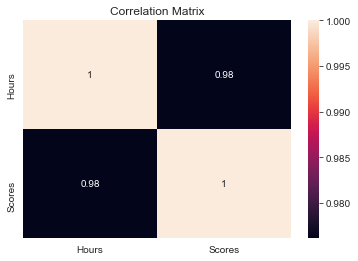

In [19]:
sns.set_style('darkgrid')
sns.heatmap(tsk1.corr(), annot=True)
plt.title('Correlation Matrix');

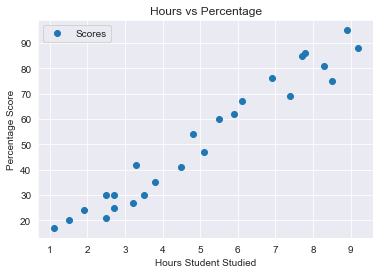

In [21]:
tsk1.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Student Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [54]:
# It shows us that as the Hours of student studies increases the percentage score also increases.

# i.e. Hours of student studies is directly proportional to its percentage score

# There is a strong positive corelation between the hours of student studied & the percentage score

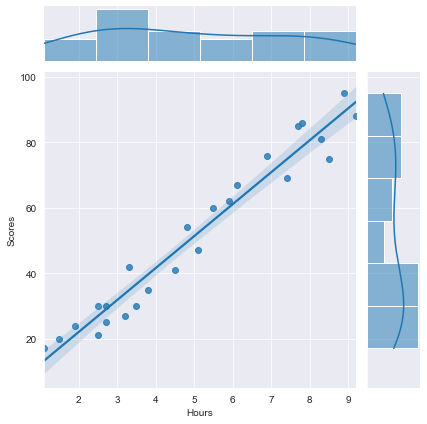

In [25]:
sns.jointplot('Hours','Scores',data=tsk1,kind='reg');

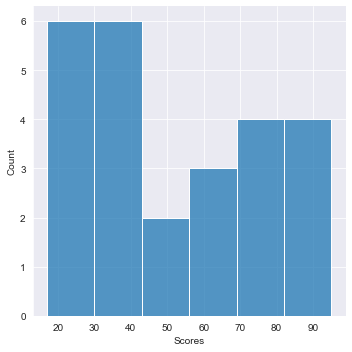

In [31]:
sns.displot(tsk1.Scores)

# Feature extraction & Engineering

In [33]:
X = tsk1.iloc[:, :-1].values
y = tsk1.iloc[:, 1].values


In [34]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [35]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [37]:
X_train.shape

(18, 1)

In [38]:
y_train.shape

(18,)

In [39]:
X_test.shape

(7, 1)

In [40]:
y_test.shape

(7,)

# Building the Model using Supervised Learning

In [42]:
from sklearn.linear_model import LinearRegression

tsk1_regressor = LinearRegression()

tsk1_regressor.fit(X_train, y_train) # Fitting Linear Regression model train dataset

LinearRegression()

In [45]:
y_pred = tsk1_regressor.predict(X_test) 
# predicting the value of y i.e Hours the student studies

In [46]:
predict = pd.DataFrame({'Hrs':[i[0] for i in X_test], 'Predicted Marks':[k for k in y_pred]})
predict

,Hrs,Predicted Marks
0,3.8,40.532064
1,4.8,50.495765
2,2.5,27.579252
3,8.5,87.361461
4,4.5,47.506655
5,7.7,79.390500
6,9.2,94.336052


In [47]:
comparing_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks':y_pred})
comparing_scores

,Actual Marks,Predicted Marks
0,35,40.532064
1,54,50.495765
2,21,27.579252
3,75,87.361461
4,41,47.506655
5,85,79.390500
6,88,94.336052


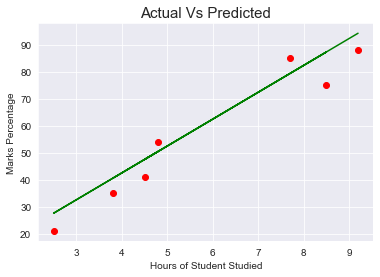

In [48]:
plt.scatter(x=X_test,y=y_test,color='red')
plt.plot(X_test,y_pred,color='green')
plt.title('Actual Vs Predicted',size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours of Student Studied',size=10)
plt.show()

# Evaluating the Model of Linear Regression

In [49]:
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  6.632745418914275


In [50]:
print('R2 Score is :',r2_score(y_test,y_pred))

R2 Score is : 0.9142138409326499


In [52]:
hours = [9.25]
answer = tsk1_regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 94.834


# In this problem statement if student studies for 9.25 hours he/she will likely score 94.834%  percentage